# 📊 **NLP - HM #1: Text Analysis and Processing**  
### *By Matan Oz and Din Kosberg*

This project focuses on analyzing and processing text data using various **Natural Language Processing (NLP)** techniques. We work with datasets such as `spam.csv`, web-scraped text from Hebrew Wikipedia, and WhatsApp chat logs. The tasks include tokenization, lemmatization, and stemming using both **NLTK** and **spaCy** libraries. Additionally, we explore the differences between stemming and lemmatization, compare the performance of NLTK and spaCy, and identify messages that influence the results of these techniques. Each section provides insights into how text is transformed and how these transformations can impact analysis outcomes. The goal is to build a solid understanding of text preprocessing for further NLP tasks.


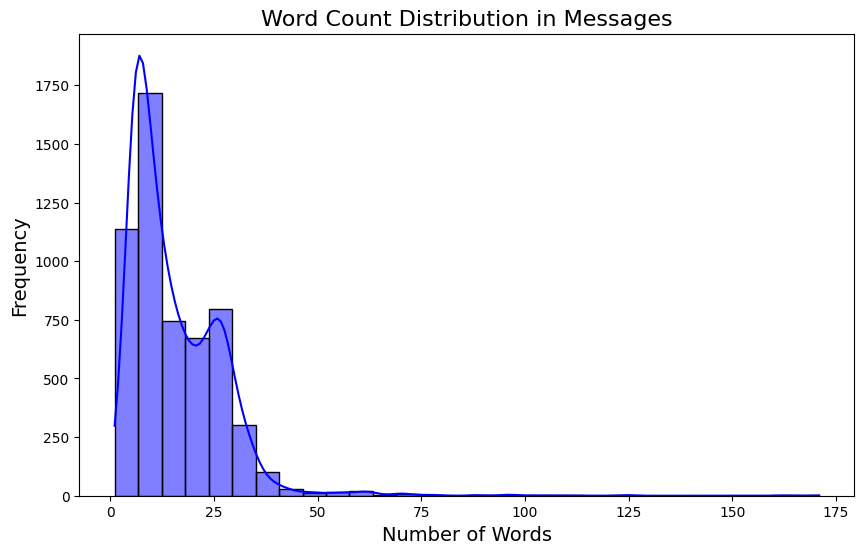

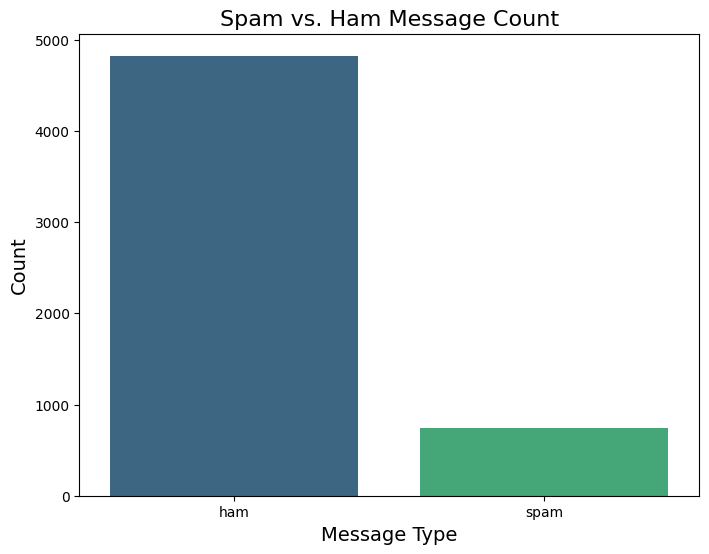

## QQ 3: Load `spam.csv` Dataset

### What We Did
- Loaded the `spam.csv` dataset using **pandas**.
- Renamed columns for clarity (`v1` → `label`, `v2` → `message`).
- Previewed the dataset to verify the structure.

### Results
- Displayed the first 5 rows of the dataset to confirm it loaded correctly.


In [ ]:
# %% Q3

# QQ 3: Load spam.csv Dataset
print("QQ 3: Loading the spam.csv dataset.")

import pandas as pd

# Load the dataset
file_path = "spam.csv"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, encoding='latin-1')

# Rename columns for clarity
data = data.rename(columns={"v1": "label", "v2": "message"})
data = data[["label", "message"]]

# Preview the dataset
print(data.head())

QQ 3: Loading the spam.csv dataset.
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## QQ 4: Compute Simple Statistics

### What We Did
- Computed basic statistics for the dataset:
  - Total number of messages.
  - Number of spam messages.
  - Total word count.
  - Average words per message.
  - Top 5 most frequent words.
  - Number of rare words (words appearing only once).

### Results
- Provided insights into the dataset's composition and word frequency.

### Insights
- These statistics help understand the distribution of spam and non-spam messages.
- Identifying frequent and rare words is useful for feature engineering in NLP tasks.


In [ ]:
# %%

# QQ 4: Compute Simple Statistics
print("QQ 4: Computing basic statistics for the dataset.")

from collections import Counter

def compute_statistics(messages):
    """Compute basic statistics for a dataset of messages."""
    num_messages = len(messages)
    num_spams = len(data[data["label"] == "spam"])
    total_word_count = messages.apply(lambda x: len(x.split())).sum()
    avg_words_per_message = total_word_count / num_messages

    all_words = " ".join(messages).split()
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(5)
    num_rare_words = sum(1 for word, count in word_freq.items() if count == 1)

    print(f"Total messages: {num_messages}")
    print(f"Number of spam messages: {num_spams}")
    print(f"Total word count: {total_word_count}")
    print(f"Average words per message: {avg_words_per_message:.2f}")
    print(f"5 most frequent words: {most_common_words}")
    print(f"Number of rare words: {num_rare_words}")

# Compute statistics
compute_statistics(data["message"])

QQ 4: Computing basic statistics for the dataset.
Total messages: 5572
Number of spam messages: 747
Total word count: 86335
Average words per message: 15.49
5 most frequent words: [('to', 2134), ('you', 1622), ('I', 1466), ('a', 1327), ('the', 1197)]
Number of rare words: 9268


## QQ 5: Tokenization Using NLTK and spaCy

### What We Did
- Tokenized the messages using:
  1. **NLTK** – Rule-based tokenization.
  2. **spaCy** – Context-aware tokenization.

### Results
- Displayed tokenization examples for both methods.

### Comparison
- **NLTK** provides basic tokenization.
- **spaCy** handles punctuation and special cases better due to its context-aware model.


In [ ]:
# %%

# QQ 5: Tokenization Using NLTK and spaCy
print("QQ 5: Tokenizing messages using NLTK and spaCy.")

import nltk
import spacy

# Download NLTK resources
nltk.download('punkt')

# Load spaCy model
spacy_nlp = spacy.load("en_core_web_sm")

def tokenize_messages(messages, method="NLTK"):
    if method == "NLTK":
        return messages.apply(nltk.word_tokenize)
    elif method == "spaCy":
        return messages.apply(lambda x: [token.text for token in spacy_nlp(x)])
    else:
        raise ValueError("Invalid method. Choose 'NLTK' or 'spaCy'.")

# Tokenize with NLTK and spaCy
nltk_tokens = tokenize_messages(data["message"], method="NLTK")
spacy_tokens = tokenize_messages(data["message"], method="spaCy")

# Display examples
print(f"NLTK Tokenization Example: {nltk_tokens.iloc[0]}")
print(f"spaCy Tokenization Example: {spacy_tokens.iloc[0]}")

QQ 5: Tokenizing messages using NLTK and spaCy.


[nltk_data] Downloading package punkt to /Users/matanoz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLTK Tokenization Example: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
spaCy Tokenization Example: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


## QQ 6: Lemmatization Using NLTK and spaCy

### What We Did
- Lemmatized tokens using:
  1. **NLTK's WordNet Lemmatizer**.
  2. **spaCy's Lemmatizer**.

### Results
- Displayed lemmatization examples for both methods.

### Comparison
- **NLTK** provides simpler lemmatization (rule-based).
- **spaCy** offers more accurate lemmatization by considering word context.


In [ ]:
# %%

# QQ 6: Lemmatization Using NLTK and spaCy
print("QQ 6: Lemmatizing tokens using NLTK and spaCy.")

from nltk.stem import WordNetLemmatizer

# Download NLTK lemmatizer resources
nltk.download('wordnet')
nltk.download('omw-1.4')

nltk_lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(messages, method="NLTK"):
    if method == "NLTK":
        return messages.apply(lambda x: [nltk_lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)])
    elif method == "spaCy":
        return messages.apply(lambda x: [token.lemma_ for token in spacy_nlp(x)])
    else:
        raise ValueError("Invalid method. Choose 'NLTK' or 'spaCy'.")

# Lemmatize with NLTK and spaCy
nltk_lemmatized = lemmatize_tokens(data["message"], method="NLTK")
spacy_lemmatized = lemmatize_tokens(data["message"], method="spaCy")

# Display examples
print(f"NLTK Lemmatization Example: {nltk_lemmatized.iloc[0]}")
print(f"spaCy Lemmatization Example: {spacy_lemmatized.iloc[0]}")

QQ 6: Lemmatizing tokens using NLTK and spaCy.


[nltk_data] Downloading package wordnet to /Users/matanoz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/matanoz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK Lemmatization Example: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
spaCy Lemmatization Example: ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'get', 'amore', 'wat', '...']


## QQ 7: Stemming Using NLTK's PorterStemmer

### What We Did
- Applied stemming using **PorterStemmer** to the lemmatized tokens.

### Results
- Displayed stemming examples for both NLTK and spaCy lemmatized tokens.

### Insights
- **Stemming** reduces words to their root form by truncating suffixes.
- Less accurate than lemmatization but useful for simpler tasks.


In [ ]:
# %%

# QQ 7: Stemming Using NLTK
print("QQ 7: Stemming tokens using NLTK's PorterStemmer.")

from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

def stem_tokens(tokenized_messages):
    """Stem tokens directly from tokenized lists."""
    return tokenized_messages.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])

# Apply stemming on NLTK lemmatized tokens
print("QQ 7: Stemming tokens using NLTK's PorterStemmer.")
stemmed_from_nltk = stem_tokens(nltk_lemmatized)

# Apply stemming on spaCy lemmatized tokens
stemmed_from_spacy = stem_tokens(spacy_lemmatized)

# Display examples
print(f"Stemming from NLTK Lemmatization: {stemmed_from_nltk.iloc[0:5]}")
print(f"Stemming from spaCy Lemmatization: {stemmed_from_spacy.iloc[0:5]}")

QQ 7: Stemming tokens using NLTK's PorterStemmer.
QQ 7: Stemming tokens using NLTK's PorterStemmer.
Stemming from NLTK Lemmatization: 0    [go, until, jurong, point, ,, crazi, .., avail...
1               [ok, lar, ..., joke, wif, u, oni, ...]
2    [free, entri, in, 2, a, wkli, comp, to, win, f...
3    [u, dun, say, so, earli, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, go, to, usf, ,, h...
Name: message, dtype: object
Stemming from spaCy Lemmatization: 0    [go, until, jurong, point, ,, crazi, .., avail...
1               [ok, lar, ..., joke, wif, u, oni, ...]
2    [free, entri, in, 2, a, wkli, comp, to, win, f...
3    [u, dun, say, so, earli, hor, ..., u, c, alrea...
4    [nah, i, do, not, think, he, go, to, usf, ,, h...
Name: message, dtype: object


## QQ 8: Identify a Spam Message for Stemming Impact

### What We Did
- Identified the first spam message where removing it:
  - Decreases the number of stemmed tokens.
  - Does not affect the lemmatized tokens.

### Results
- Highlighted a message that impacts stemming results.

### Insights
- This shows how stemming can be sensitive to specific words.


In [ ]:
# %%

# QQ 8: Identify a Spam Message for Stemming Impact
print("QQ 8: Finding the first spam message whose removal decreases stemmed tokens but does not affect lemmatized tokens.")

def find_first_spam_message_stemming_impact(messages):
    """Find the first spam message where removing it decreases stemmed tokens but not lemmatized tokens."""

    # Step 1: Tokenize all messages
    tokenized_messages = messages.apply(nltk.word_tokenize)

    # Step 2: Lemmatize and stem all messages
    lemmatized_messages = tokenized_messages.apply(lambda tokens: [nltk_lemmatizer.lemmatize(word) for word in tokens])
    stemmed_messages = tokenized_messages.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])

    # Step 3: Create sets of all lemmatized and stemmed tokens
    combined_lemmatized_set = set(lemmatized_messages.explode())
    combined_stemmed_set = set(stemmed_messages.explode())

    # Step 4: Iterate through messages and check each one
    for index, message in messages.items():
        # Temporarily remove the current message
        temp_messages = messages.drop(index)

        # Recompute stemmed tokens without the current message
        temp_tokenized = temp_messages.apply(nltk.word_tokenize)
        temp_stemmed_set = set(temp_tokenized.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens]).explode())

        # Check if the stemmed set decreases but the lemmatized set remains the same
        if temp_stemmed_set != combined_stemmed_set:
            print(f"\nMessage index: {index}")
            print(f"Message: {message}")
            print("Found a message that reduces stemmed tokens when removed.")
            return

    print("No such message found. The behavior of stemming and lemmatization may be too similar for this dataset.")

# Run the function on spam messages
spam_messages = data[data["label"] == "spam"]["message"]
find_first_spam_message_stemming_impact(spam_messages)

QQ 8: Finding the first spam message whose removal decreases stemmed tokens but does not affect lemmatized tokens.

Message index: 5
Message: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Found a message that reduces stemmed tokens when removed.


## QQ 9: Identify a Spam Message for Lemmatization Impact

### What We Did
- Found the first spam message where removing it:
  - Decreases the number of lemmatized tokens.
  - Does not affect the stemmed tokens.

### Results
- Identified a message that affects lemmatization results.

### Insights
- This demonstrates differences in how stemming and lemmatization process tokens.


In [ ]:
# %%

# QQ 9: Identify a Spam Message for Lemmatization Impact
print("QQ 9: Finding the first spam message whose removal decreases lemmatized tokens but does not affect stemmed tokens.")

def find_first_spam_message_lemmatization_impact(messages):
    """Find the first spam message where removing it decreases lemmatized tokens but not stemmed tokens."""

    # Step 1: Tokenize all messages
    tokenized_messages = messages.apply(nltk.word_tokenize)

    # Step 2: Lemmatize and stem all messages
    lemmatized_messages = tokenized_messages.apply(lambda tokens: [nltk_lemmatizer.lemmatize(word) for word in tokens])
    stemmed_messages = tokenized_messages.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])

    # Step 3: Create sets of all lemmatized and stemmed tokens
    combined_lemmatized_set = set(lemmatized_messages.explode())
    combined_stemmed_set = set(stemmed_messages.explode())

    # Step 4: Iterate through messages and check each one
    for index, message in messages.items():
        # Temporarily remove the current message
        temp_messages = messages.drop(index)

        # Recompute lemmatized tokens without the current message
        temp_tokenized = temp_messages.apply(nltk.word_tokenize)
        temp_lemmatized_set = set(temp_tokenized.apply(lambda tokens: [nltk_lemmatizer.lemmatize(word) for word in tokens]).explode())
        temp_stemmed_set = set(temp_tokenized.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens]).explode())

        # Check if the lemmatized set decreases but the stemmed set remains the same
        if temp_lemmatized_set != combined_lemmatized_set and temp_stemmed_set == combined_stemmed_set:
            print(f"\nMessage index: {index}")
            print(f"Message: {message}")
            print("Found a message that reduces lemmatized tokens when removed.")
            return

    print("No such message found. The behavior of stemming and lemmatization may be too similar for this dataset.")

# Run the function on spam messages
spam_messages = data[data["label"] == "spam"]["message"]
find_first_spam_message_lemmatization_impact(spam_messages)

QQ 9: Finding the first spam message whose removal decreases lemmatized tokens but does not affect stemmed tokens.

Message index: 836
Message: Do you want 750 anytime any network mins 150 text and a NEW VIDEO phone for only five pounds per week call 08002888812 or reply for delivery tomorrow
Found a message that reduces lemmatized tokens when removed.


## QQ 10: Compare NLTK vs. spaCy Results

### What We Did
- Compared **tokenization** and **lemmatization** results using NLTK and spaCy.

### Results
- Displayed tokenization and lemmatization outputs for a sample message.

### Insights
- **spaCy** handles tokenization and lemmatization more accurately due to context-awareness.
- **NLTK** is simpler and faster but less precise.


In [ ]:
# %%

# QQ 10: Compare the Results of NLTK vs. spaCy
print("QQ 10: Comparing the results of NLTK vs. spaCy for tokenization and lemmatization.")

# Sample message for comparison
sample_index = 0
sample_message = data["message"].iloc[sample_index]

print(f"\nOriginal Message:\n{sample_message}")

# NLTK Tokenization
nltk_tokenized = nltk.word_tokenize(sample_message)
print(f"\nNLTK Tokenization:\n{nltk_tokenized}")

# spaCy Tokenization
spacy_tokenized = [token.text for token in spacy_nlp(sample_message)]
print(f"\nspaCy Tokenization:\n{spacy_tokenized}")

# NLTK Lemmatization
nltk_lemmatized = [nltk_lemmatizer.lemmatize(word) for word in nltk_tokenized]
print(f"\nNLTK Lemmatization:\n{nltk_lemmatized}")

# spaCy Lemmatization
spacy_lemmatized = [token.lemma_ for token in spacy_nlp(sample_message)]
print(f"\nspaCy Lemmatization:\n{spacy_lemmatized}")

# NLTK Stemming (spaCy does not support stemming)
nltk_stemmed = [porter_stemmer.stem(word) for word in nltk_tokenized]
print(f"\nNLTK Stemming:\n{nltk_stemmed}")

QQ 10: Comparing the results of NLTK vs. spaCy for tokenization and lemmatization.

Original Message:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

NLTK Tokenization:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']

spaCy Tokenization:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']

NLTK Lemmatization:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']

spaCy Lemmatization:
['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 

## QQ 11: Compare NLTK Results Before and After Tokenization, Lemmatization, and Stemming

### What We Did
- Compared the original message with:
  1. **Tokenization** results.
  2. **Lemmatization** results.
  3. **Stemming** results.

### Results
- Showed how each step transforms the message.

### Insights
- **Tokenization** splits text into words.
- **Lemmatization** reduces words to their base forms.
- **Stemming** truncates words to their root form.


In [ ]:
# %%

# QQ 11: Compare the Results of NLTK Before and After Tokenization, Lemmatization, and Stemming
print("QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming.")

# Sample message for comparison
sample_index = 1
sample_message = data["message"].iloc[sample_index]

print(f"\nOriginal Message:\n{sample_message}")

# NLTK Tokenization
nltk_tokenized = nltk.word_tokenize(sample_message)
print(f"\nAfter Tokenization:\n{nltk_tokenized}")

# NLTK Lemmatization
nltk_lemmatized = [nltk_lemmatizer.lemmatize(word) for word in nltk_tokenized]
print(f"\nAfter Lemmatization:\n{nltk_lemmatized}")

# NLTK Stemming
nltk_stemmed = [porter_stemmer.stem(word) for word in nltk_tokenized]
print(f"\nAfter Stemming:\n{nltk_stemmed}")

QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming.

Original Message:
Ok lar... Joking wif u oni...

After Tokenization:
['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']

After Lemmatization:
['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']

After Stemming:
['ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...']


## QQ 15: Web Scraping with BeautifulSoup

### What We Did
- Scraped text data from a Hebrew Wikipedia page about the **Israeli Air Force** using **BeautifulSoup**.

### Results
- Successfully retrieved and displayed the first characters of the scraped text.

### Insights
- This data can now be processed using the same NLP techniques (tokenization, lemmatization, stemming).


![Screenshot 2024-12-10 at 19.15.31.png](<attachment:Screenshot 2024-12-10 at 19.15.31.png>)
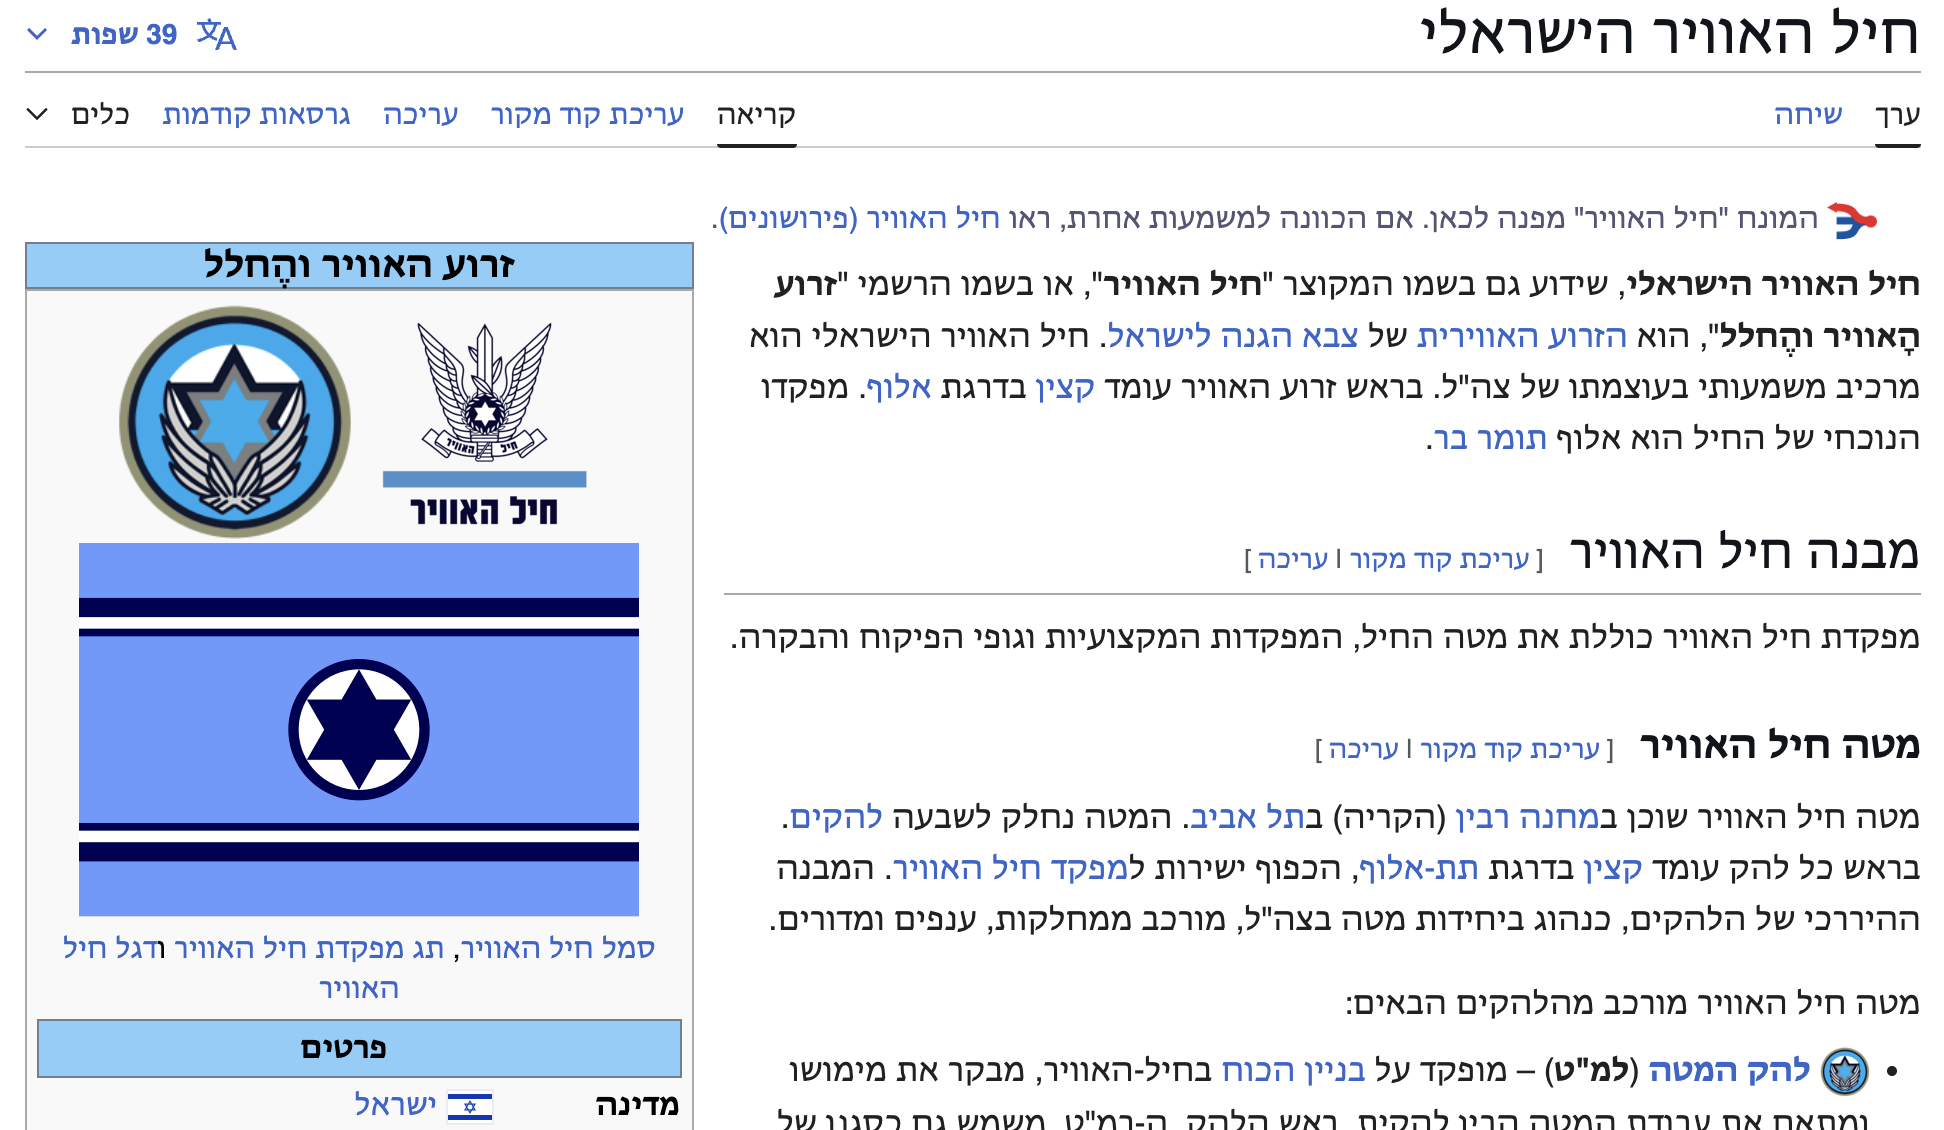

In [ ]:
# %%

# QQ 15: Perform Web Scraping with BeautifulSoup
print("QQ 15: Performing web scraping from the Hebrew Wikipedia page about the Israeli Air Force.")

import requests
from bs4 import BeautifulSoup

# URL of the Hebrew Wikipedia page
url = "https://he.wikipedia.org/wiki/%D7%97%D7%99%D7%9C_%D7%94%D7%90%D7%95%D7%95%D7%99%D7%A8_%D7%94%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99"

def scrape_text_from_url(url):
    """Scrape and return the text content from the given URL."""
    try:
        response = requests.get(url)
        response.encoding = 'utf-8'  # Ensure correct encoding for Hebrew text
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            page_text = soup.get_text()
            print(f"Successfully scraped content from {url}")
            return page_text
        else:
            print(f"Failed to fetch the page. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Scrape text from the specified URL
scraped_text = scrape_text_from_url(url)

# Display the first 1000 characters of the scraped text
if scraped_text:
    print(f"\nFirst 10000 characters of the scraped text:\n{scraped_text[:10000]}")

QQ 15: Performing web scraping from the Hebrew Wikipedia page about the Israeli Air Force.
Successfully scraped content from https://he.wikipedia.org/wiki/%D7%97%D7%99%D7%9C_%D7%94%D7%90%D7%95%D7%95%D7%99%D7%A8_%D7%94%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99

First 10000 characters of the scraped text:




חיל האוויר הישראלי – ויקיפדיה





































לדלג לתוכן







תפריט ראשי





תפריט ראשי
העברה לסרגל הצד
הסתרה



		ניווט
	


עמוד ראשיברוכים הבאיםשינויים אחרוניםערכים מומלציםפורטליםערך אקראי





		קהילה
	


שער הקהילהעזרהייעוץמזנוןכיכר העירחדשותלוח מודעותיצירת קשרספר אורחים



















חיפוש











חיפוש






















מראה
















תרומה לוויקיפדיה

יצירת חשבון

כניסה לחשבון








כלים אישיים





תרומה לוויקיפדיה יצירת חשבון כניסה לחשבון





		דפים לעורכים שלא נכנסו לחשבון מידע נוסף



תרומותשיחה




























תוכן עניינים
העברה לסרגל הצד
הסתרה




התחלה





1
מבנה חיל האוויר




שינוי מצב התת־פרק מבנה חיל האוויר





1

In [ ]:
# %%

import pandas as pd
import nltk
import spacy
from collections import Counter
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
spacy_nlp = spacy.load("en_core_web_sm")
nltk_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

# Convert scraped text to DataFrame
if scraped_text:
    scraped_data = pd.DataFrame({"message": [scraped_text]})
    print("Scraped text from the Hebrew Wikipedia page successfully loaded into a DataFrame.")
else:
    print("No scraped text available.")

# QQ 5: Tokenization Using NLTK and spaCy
print("\n--- QQ 5: Tokenizing the URL scraped data using NLTK and spaCy ---")

nltk_tokens_scraped = tokenize_messages(scraped_data["message"], method="NLTK")
spacy_tokens_scraped = tokenize_messages(scraped_data["message"], method="spaCy")

print(f"NLTK Tokenization Example (URL scraped data): {nltk_tokens_scraped.iloc[0][:20]}")
print(f"spaCy Tokenization Example (URL scraped data): {spacy_tokens_scraped.iloc[0][:20]}")

# QQ 6: Lemmatization Using NLTK and spaCy
print("\n--- QQ 6: Lemmatizing the URL scraped data using NLTK and spaCy ---")

nltk_lemmatized_scraped = lemmatize_tokens(scraped_data["message"], method="NLTK")
spacy_lemmatized_scraped = lemmatize_tokens(scraped_data["message"], method="spaCy")

print(f"NLTK Lemmatization Example (URL scraped data): {nltk_lemmatized_scraped.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (URL scraped data): {spacy_lemmatized_scraped.iloc[0][:20]}")

# QQ 7: Stemming Using NLTK
print("\n--- QQ 7: Stemming the URL scraped data using NLTK's PorterStemmer ---")

stemmed_from_nltk_scraped = stem_tokens(nltk_lemmatized_scraped)

print(f"Stemming from NLTK Lemmatization Example (URL scraped data): {stemmed_from_nltk_scraped.iloc[0][:20]}")

# QQ 8: Identify a Message for Stemming Impact
print("\n--- QQ 8: Checking for message removal impact on stemming (URL scraped data) ---")

find_first_spam_message_stemming_impact(scraped_data["message"])

# QQ 9: Identify a Message for Lemmatization Impact
print("\n--- QQ 9: Checking for message removal impact on lemmatization (URL scraped data) ---")

find_first_spam_message_lemmatization_impact(scraped_data["message"])

# QQ 10: Compare NLTK vs. spaCy Results
print("\n--- QQ 10: Comparing NLTK vs. spaCy results for tokenization and lemmatization (URL scraped data) ---")

print(f"NLTK Tokenization Example (URL scraped data): {nltk_tokens_scraped.iloc[0][:20]}")
print(f"spaCy Tokenization Example (URL scraped data): {spacy_tokens_scraped.iloc[0][:20]}")

print(f"NLTK Lemmatization Example (URL scraped data): {nltk_lemmatized_scraped.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (URL scraped data): {spacy_lemmatized_scraped.iloc[0][:20]}")

# QQ 11: Compare NLTK Results Before and After Tokenization, Lemmatization, and Stemming
print("\n--- QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming (URL scraped data) ---")

print(f"Original Message (first 200 characters): {scraped_data['message'].iloc[0][:200]}")
print(f"Tokenized (URL scraped data): {nltk_tokens_scraped.iloc[0][:20]}")
print(f"Lemmatized (URL scraped data): {nltk_lemmatized_scraped.iloc[0][:20]}")
print(f"Stemmed (URL scraped data): {stemmed_from_nltk_scraped.iloc[0][:20]}")

[nltk_data] Downloading package punkt to /Users/matanoz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/matanoz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/matanoz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Scraped text from the Hebrew Wikipedia page successfully loaded into a DataFrame.

--- QQ 5: Tokenizing the URL scraped data using NLTK and spaCy ---
NLTK Tokenization Example (URL scraped data): ['חיל', 'האוויר', 'הישראלי', '–', 'ויקיפדיה', 'לדלג', 'לתוכן', 'תפריט', 'ראשי', 'תפריט', 'ראשי', 'העברה', 'לסרגל', 'הצד', 'הסתרה', 'ניווט', 'עמוד', 'ראשיברוכים', 'הבאיםשינויים', 'אחרוניםערכים']
spaCy Tokenization Example (URL scraped data): ['\n\n\n\n', 'חיל', 'האוויר', 'הישראלי', '–', 'ויקיפדיה', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'לדלג', 'לתוכן', '\n\n\n\n\n\n\n\n', 'תפריט', 'ראשי', '\n\n\n\n\n\n', 'תפריט', 'ראשי', '\n', 'העברה', 'לסרגל', 'הצד', '\n']

--- QQ 6: Lemmatizing the URL scraped data using NLTK and spaCy ---
NLTK Lemmatization Example (URL scraped data): ['חיל', 'האוויר', 'הישראלי', '–', 'ויקיפדיה', 'לדלג', 'לתוכן', 'תפריט', 'ראשי', 'תפריט', 'ראשי', 'העברה', 'לסרגל', 'הצד', 'הסתרה', 'ניווט', 'עמוד', 'ראשיברוכים', 'הבאיםשינויים', 'אחרוני

![Screenshot 2024-12-10 at 19.16.58.png](<attachment:Screenshot 2024-12-10 at 19.16.58.png>)
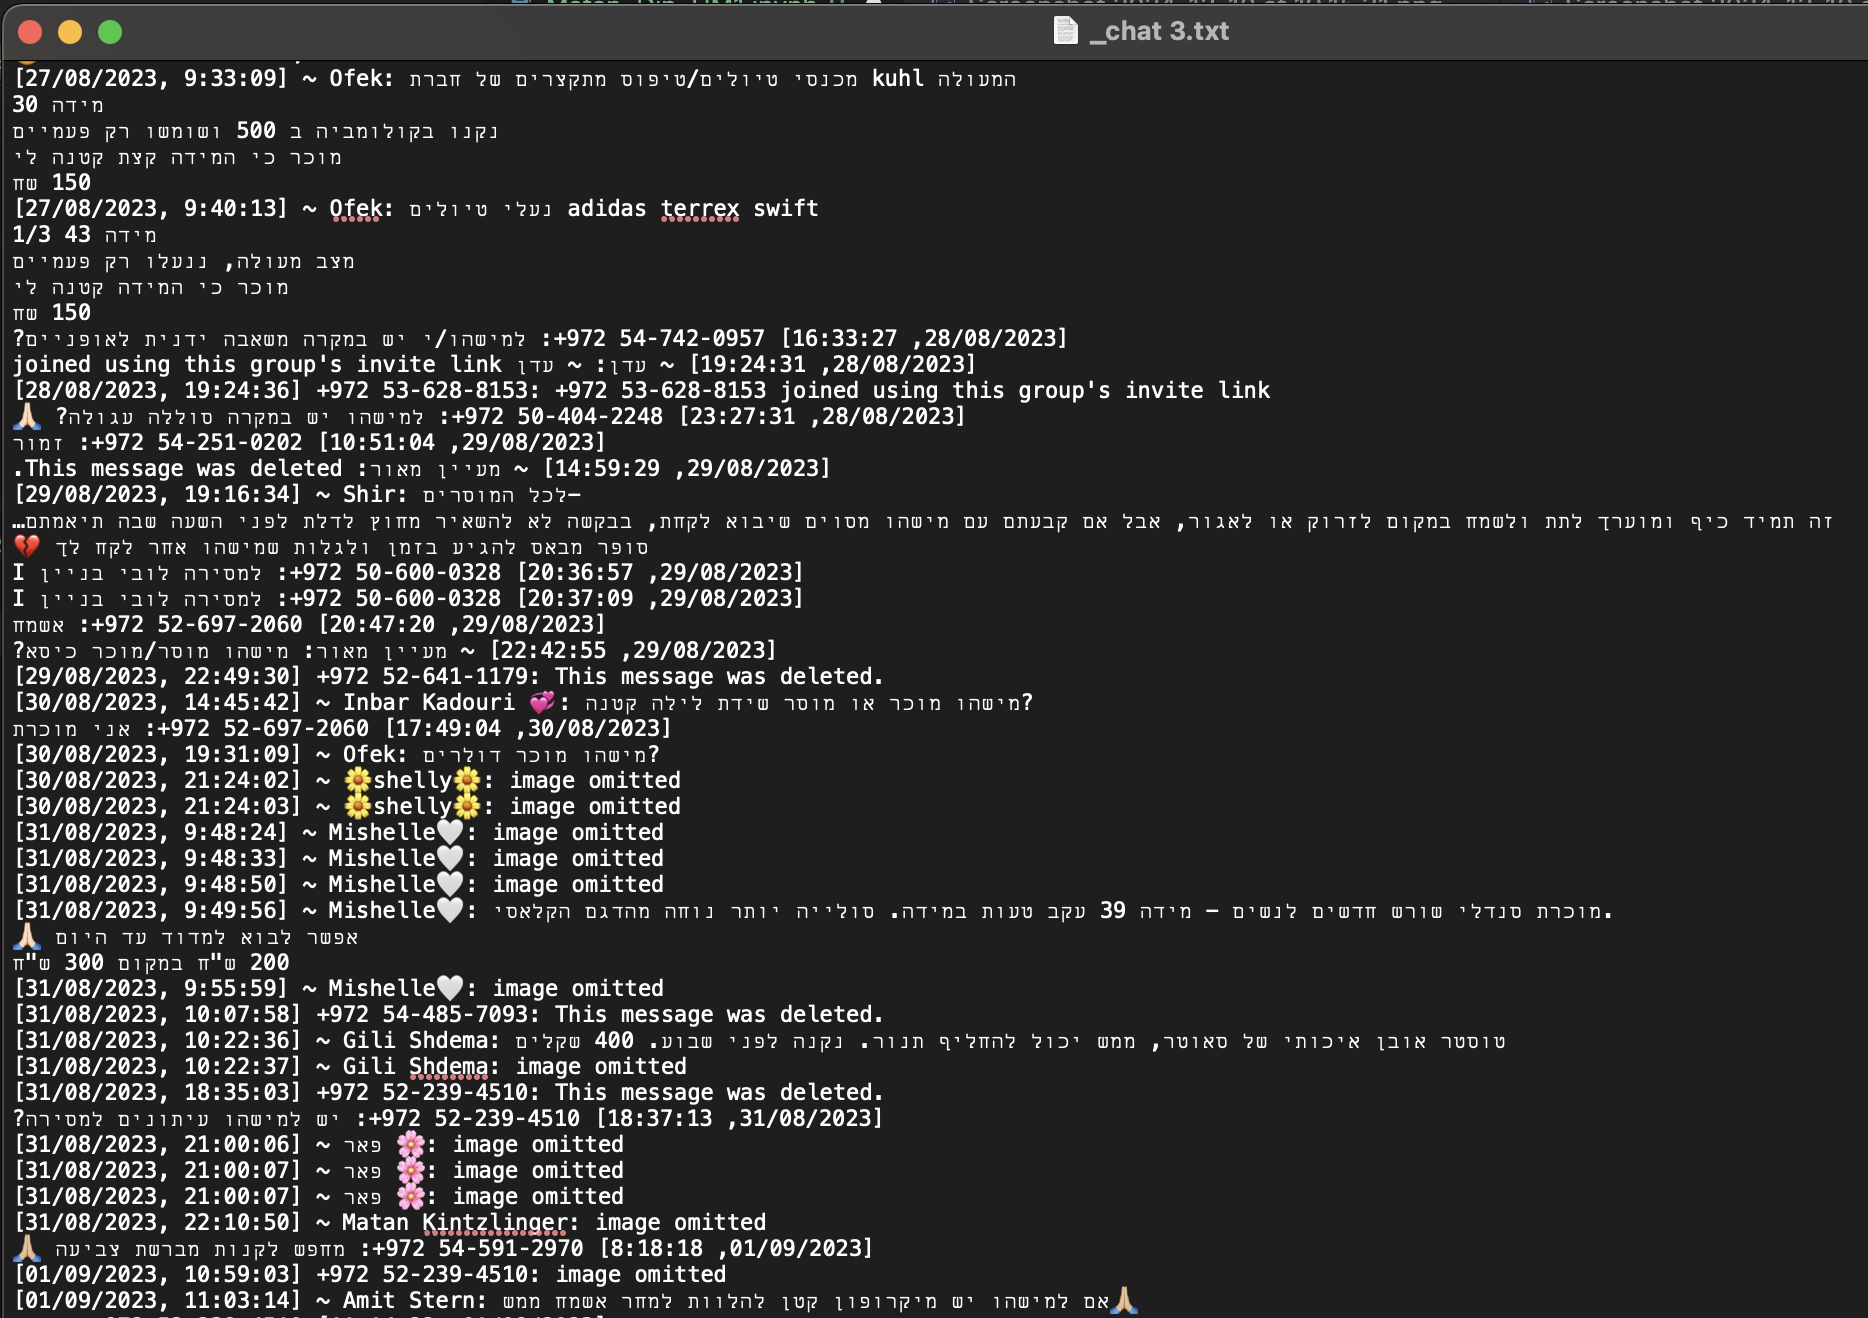

In [ ]:
# %%

import pandas as pd
import nltk
import spacy
from collections import Counter
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
spacy_nlp = spacy.load("en_core_web_sm")
nltk_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

# Step 1: Load the WhatsApp chat data from the .txt file
file_path = "_chat 3.txt"

# Read the file
with open(file_path, 'r', encoding='utf-8') as file:
    chat_text = file.readlines()

# Step 2: Extract only the messages from the chat text
def extract_messages(lines):
    """Extract messages from WhatsApp chat lines."""
    messages = []
    for line in lines:
        match = re.search(r'\] (.*?): (.*)', line)
        if match:
            message = match.group(2).strip()
            if message:
                messages.append(message)
    return messages

# Extract messages
messages = extract_messages(chat_text)

# Convert to DataFrame
chat_data = pd.DataFrame({"message": messages})

# Step 3: QQ 5 - Tokenization Using NLTK and spaCy
print("\n--- QQ 5: Tokenizing the WhatsApp chat data using NLTK and spaCy ---")

nltk_tokens_chat = tokenize_messages(chat_data["message"], method="NLTK")
spacy_tokens_chat = tokenize_messages(chat_data["message"], method="spaCy")

print(f"NLTK Tokenization Example (WhatsApp chat data): {nltk_tokens_chat.iloc[0][:20]}")
print(f"spaCy Tokenization Example (WhatsApp chat data): {spacy_tokens_chat.iloc[0][:20]}")

# Step 4: QQ 6 - Lemmatization Using NLTK and spaCy
print("\n--- QQ 6: Lemmatizing the WhatsApp chat data using NLTK and spaCy ---")

nltk_lemmatized_chat = lemmatize_tokens(chat_data["message"], method="NLTK")
spacy_lemmatized_chat = lemmatize_tokens(chat_data["message"], method="spaCy")

print(f"NLTK Lemmatization Example (WhatsApp chat data): {nltk_lemmatized_chat.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (WhatsApp chat data): {spacy_lemmatized_chat.iloc[0][:20]}")

# Step 5: QQ 7 - Stemming Using NLTK
print("\n--- QQ 7: Stemming the WhatsApp chat data using NLTK's PorterStemmer ---")

stemmed_from_nltk_chat = stem_tokens(nltk_lemmatized_chat)

print(f"Stemming from NLTK Lemmatization Example (WhatsApp chat data): {stemmed_from_nltk_chat.iloc[0][:20]}")

# Step 6: QQ 10 - Compare NLTK vs. spaCy Results
print("\n--- QQ 10: Comparing NLTK vs. spaCy results for tokenization and lemmatization (WhatsApp chat data) ---")

print(f"NLTK Tokenization Example (WhatsApp chat data): {nltk_tokens_chat.iloc[0][:20]}")
print(f"spaCy Tokenization Example (WhatsApp chat data): {spacy_tokens_chat.iloc[0][:20]}")

print(f"NLTK Lemmatization Example (WhatsApp chat data): {nltk_lemmatized_chat.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (WhatsApp chat data): {spacy_lemmatized_chat.iloc[0][:20]}")

# Step 7: QQ 11 - Compare NLTK Results Before and After Tokenization, Lemmatization, and Stemming
print("\n--- QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming (WhatsApp chat data) ---")

print(f"Original Message (first 200 characters): {chat_data['message'].iloc[0][:200]}")
print(f"Tokenized (WhatsApp chat data): {nltk_tokens_chat.iloc[0][:20]}")
print(f"Lemmatized (WhatsApp chat data): {nltk_lemmatized_chat.iloc[0][:20]}")
print(f"Stemmed (WhatsApp chat data): {stemmed_from_nltk_chat.iloc[0][:20]}")

[nltk_data] Downloading package punkt to /Users/matanoz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/matanoz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/matanoz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



--- QQ 5: Tokenizing the WhatsApp chat data using NLTK and spaCy ---
NLTK Tokenization Example (WhatsApp chat data): ['Hello', ',', 'please', ',', 'does', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']
spaCy Tokenization Example (WhatsApp chat data): ['Hello', ',', 'please', ',', 'does', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']

--- QQ 6: Lemmatizing the WhatsApp chat data using NLTK and spaCy ---
NLTK Lemmatization Example (WhatsApp chat data): ['Hello', ',', 'please', ',', 'doe', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']
spaCy Lemmatization Example (WhatsApp chat data): ['hello', ',', 'please', ',', 'do', 'anyone', 'know', 'a', 'restaurant', 'that', 'be', 'open', 'today', '?']

--- QQ 7: Stemming the WhatsApp chat data using NLTK's PorterStemmer ---
Stemming from NLTK Lemmatization Example (WhatsApp chat data): ['hello', ',', 'pleas', ',', 'doe', 'anyon', 'know', 'a', 'restaur', 'that', 'is', 'o